<a href="https://colab.research.google.com/github/HVGROOT/CLI-based-Quiz/blob/main/Lightcurves_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pylightcurve


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Add to PYTHONPATH the path to local libraries
LOCALPATH = "https://drive.google.com/drive/folders/1uwdPl1QMmuNJIJBysy1-XtKAWw9zM7ch?usp=drive_link"
if not any(filter( lambda x: 'pythonlib_2021' in x, sys.path )) :
  sys.path.append(LOCALPATH)
  print("Added\n  \"{:s}\"\nto your PYTHONPATH".format(sys.path[-1]))

import pylightcurve as plc


Mounted at /content/drive
Added
  "https://drive.google.com/drive/folders/1uwdPl1QMmuNJIJBysy1-XtKAWw9zM7ch?usp=drive_link"
to your PYTHONPATH


In [ ]:
planet_name = 'HD 209458b'
Gamma = 0.165

planet      = plc.get_planet(planet_name)
rp_over_rs  = planet.rp_over_rs
sma_over_rs = planet.sma_over_rs
period      = planet.period
ecc         = planet.eccentricity
inc         = planet.inclination
albedo      = planet.albedo # Arbitrary
emissivity  = planet.emissivity
Tstar       = planet.stellar_temperature
Tplanet     = Tstar * (0.5*(1-albedo)/emissivity)**(1/4)/np.sqrt(sma_over_rs)
Tday        = Tplanet*(1-Gamma)**(1/4)
Tnight      = Tplanet*Gamma**(1/4)
phi0        = 40.9 # deg
t0          = period/2


print('T(planet) = {:.0f} K, Bond albedo = {:.2f}'. format(Tplanet, albedo))
print('T(day): {:.0f}K, T(night): {:.0f}K, Transit depth: {:.1f}%'.format(Tday, Tnight, 100*rp_over_rs**2))

T(planet) = 1655 K, Bond albedo = 0.15
T(day): 1582K, T(night): 1055K, Transit depth: 1.5%


0.62 SDSS_r
1.25 2mass_j
4.5 irac2


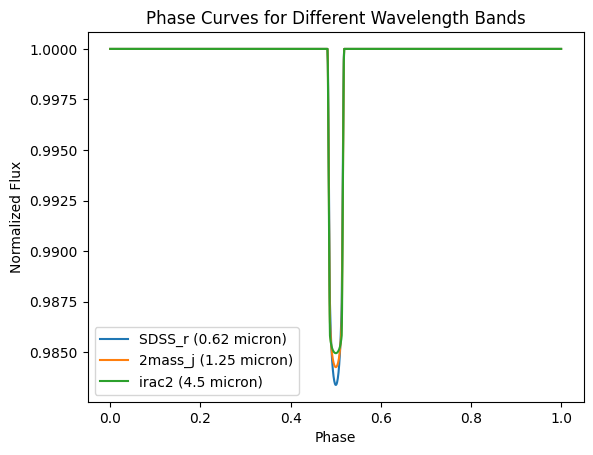

In [ ]:
# Define the wavelength bands and corresponding central wavelengths
#wavelength_bands = {
 #   'visible': {'filter': 'jhonson_v', 'wl': 2.15},
  #  'near-IR': {'filter': '2mass_ks', 'wl': 2.15},
   # 'mid-IR': {'filter': 'wise_w1', 'wl': 3.4}
#}
filter_list = ['SDSS_r', '2mass_j', 'irac2']
wl_list = [0.620, 1.25, 4.5] # microns


# Define other parameters
delta_t = 10.0/3600.0  # Sampling interval in hours
T14 = planet.transit_duration('2mass_j')
tt = np.arange(0, period, delta_t)
phase = plc.planet_phase(period, t0, tt) + 0.5
rp_over_rs = planet.rp_over_rs  # Radius ratio of the planet to the star
period = planet.period  # Orbital period
sma_over_rs = planet.sma_over_rs  # Semi-major axis ratio of the planet's orbit
ecc = planet.eccentricity # Orbital eccentricity
inc = planet.inclination # Orbital inclination
t0 = period/2  # Transit center time

# Initialize the figure and axes
fig, ax = plt.subplots()

# Iterate over the wavelength bands
for wl, filter_name in zip(wl_list, filter_list):
  print(wl, filter_name)
  ldc = planet.filter(filter_name.lower()).limb_darkening_coefficients
  LC_T = plc.transit(ldc, rp_over_rs, period, sma_over_rs, ecc, inc, 0.0, t0, tt)
     # Plot the phase curve for the current wavelength band
  ax.plot(phase, LC_T, label=f'{filter_name} ({wl} micron)')

# Set the plot title and labels
  ax.set_title('Phase Curves for Different Wavelength Bands')
  ax.set_xlabel('Phase')
  ax.set_ylabel('Normalized Flux')
  ax.legend()

plt.show()

OBSERVATIONS:

In [ ]:
from itertools import cycle

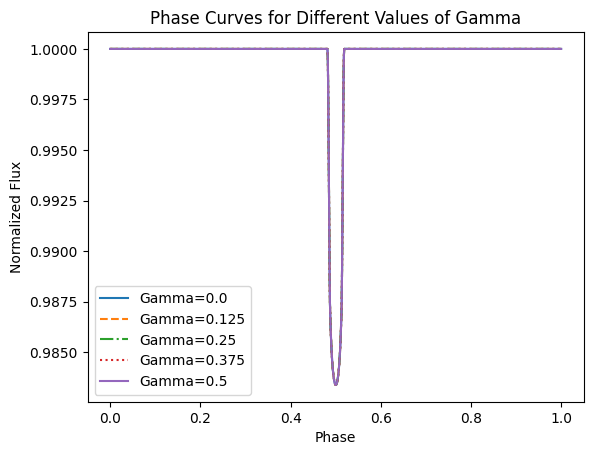

In [ ]:
gamma_values = np.linspace(0, 0.5, num=5)

# Other parameters
filter_name = 'SDSS_r'
wl = 0.620  # microns
delta_t = 10.0 / 3600.0  # Sampling interval in hours
tt = np.arange(0, period, delta_t)
phase = plc.planet_phase(period, t0, tt) + 0.5
rp_over_rs = planet.rp_over_rs
period = planet.period
sma_over_rs = planet.sma_over_rs
ecc = planet.eccentricity
inc = planet.inclination
t0 = period / 2

# Initialize the figure and axes
fig, ax = plt.subplots()
line_styles = cycle(['-', '--', '-.', ':'])

# Iterate over different values of Γ
for gamma, line_style in zip(gamma_values, line_styles):
    # Compute the transit light curve for the current Γ value
    ldc = planet.filter(filter_name.lower()).limb_darkening_coefficients
    LC_T = plc.transit(ldc, rp_over_rs, period, sma_over_rs, ecc, inc, gamma, t0, tt)

    ax.plot(phase, LC_T, linestyle=line_style, label=f'Gamma={gamma}')
    # Plot the phase curve for the current Γ value
   # ax.plot(phase, LC_T, label=f'Gamma={gamma}')

# Set the plot title and labels
ax.set_title('Phase Curves for Different Values of Gamma')
ax.set_xlabel('Phase')
ax.set_ylabel('Normalized Flux')
ax.legend()

# Display the plot
plt.show()